In [258]:
from scipy import integrate, optimize
import numpy as np
import matplotlib.pyplot as plt

In [259]:
# SIR ODE model

def SIR_model(y, x, beta, gamma):
    S, I, R = y
    
    dS_dt = -beta * S * I 
    dR_dt = gamma * I 
    dI_dt = -(dS_dt + dR_dt)
    return ([dS_dt, dI_dt, dR_dt])

In [260]:
n = 763 + 130 # student and staff population

x = np.arange(1, 15, dtype = float)
y = np.array([3, 8, 26, 76, 334, 315, 363, 395, 365, 294, 218, 114, 61, 24], dtype = float) / n
t = np.linspace(1,15, 1000)

N = 1.0
I0 = y[0]
S0 = N - I0 
R0 = 0.0

def fit_odeint(x, beta, gamma):
    return integrate.odeint(SIR_model, [S0, I0, R0], x, args=(beta, gamma))[:,1]

popt, pcov = optimize.curve_fit(fit_odeint, x, y)
beta, gamma = popt
fitted = fit_odeint(x, beta, gamma)

# Result
solution = integrate.odeint(SIR_model, [S0, I0, R0], t, args = (beta, gamma))
solution = np.array(solution) 

In [267]:
# Basic reproduction number

R = beta / gamma
R

4.884942816126499

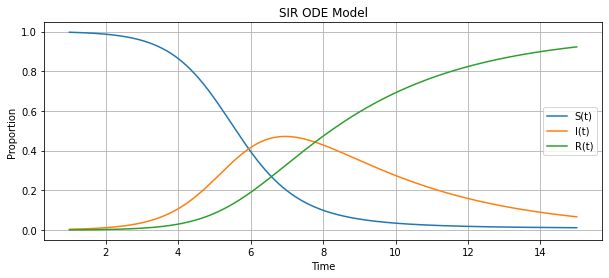

In [262]:
# Plot
plt.figure(figsize = [10, 4])
plt.plot(t, solution[:, 0], label = 'S(t)')
plt.plot(t, solution[:, 1], label = 'I(t)')
plt.plot(t, solution[:, 2], label = 'R(t)')
plt.grid()
plt.legend()
plt.xlabel('Time')
plt.ylabel('Proportion')
plt.title('SIR ODE Model');

In [265]:
# Immunization

eff = 0.9
pc = 1 - (1/R)
cost = np.round(pc*n / eff, 2)
print('$' + str(cost) +' needed to reach critical fraction of immunization and interrupt transmission.')

$789.1 needed to reach critical fraction of immunization and interrupt transmission.
